Shauna Smith 

Project 1 "FERB"


In [1]:
import pandas as pd

In [527]:
df1=pd.read_csv(r"C:\Users\Shaun\Downloads\dog_intelligence.csv")


In [528]:
df1.dropna()

,Breed,Classification,obey,reps_lower,reps_upper
0,Border Collie,Brightest Dogs,95%,1,4
1,Poodle,Brightest Dogs,95%,1,4
2,German Shepherd,Brightest Dogs,95%,1,4
3,Golden Retriever,Brightest Dogs,95%,1,4
4,Doberman Pinscher,Brightest Dogs,95%,1,4
...,...,...,...,...,...
120,Saint Bernard,Fair Working/Obedience Intelligence,30%,41,80
121,Bull Terrier,Fair Working/Obedience Intelligence,30%,41,80
122,Chihuahua,Fair Working/Obedience Intelligence,30%,41,80
123,Lhasa Apso,Fair Working/Obedience Intelligence,30%,41,80


In [529]:
df1=df1.fillna('10%')

In [530]:
df1=df1.drop(['reps_lower','reps_upper'], axis=1)

In [531]:
df1.obey.unique()

array(['95%', '85%', '70%', '50%', '30%', '10%'], dtype=object)

In [532]:
df1.Classification.unique()

array(['Brightest Dogs', 'Excellent Working Dogs',
       'Above Average Working Dogs',
       'Average Working/Obedience Intelligence',
       'Fair Working/Obedience Intelligence',
       'Lowest Degree of Working/Obedience Intelligence '], dtype=object)

In [533]:
#Indicies 61-135 require the most amount of training for success 
#with a starting rate of 50% or less chance regarding successful obedience training from reps.
class3=df1.iloc[101:126:]

In [534]:
#Incicies 31-60 mid level of training required for success
class2=df1.iloc[30:62:]

In [535]:
#indicies 1-30 are easiest breeds with least required training for success.
class1=df1.iloc[1:32:]

In [536]:
df1['level_4_success']=1

In [537]:
df1['level_4_success']=df1['obey'].map({'95%':1, '85%':1,'70%':2, '50%':3, '30%':3, '10%':3})

In [538]:
#3 levels_4_success are indicitive to the required minimum amount of hours/day in 1st year.
#(I.E. 1=1hour training/day minimum, 2=2hour training/day minimum, 3=3hour training/day minimum)
#training is repetition to achieve expectations of success for obedience in desired behaviors. 
#Consequently, finished training will improve the adoption permanence as the family pet 
#as a correlated effort to behavior expectation fullfillments and training investments. 


3 levels_4_success are indicitive to the required minimum amount of hours/day in 1st year.
(I.E. 1=1hour training/day minimum, 2=2hour training/day minimum, 3=3hour training/day minimum)

Training is deemed as a repetition of a desired behavior to achieve the expectation of success for obedience in said behaviors. 
Consequently, "finished training", will improve the adoption permanence as the family pet 
as a correlated effort to behavior expectation fullfillments/"obedience" and expected training investments. 


In [539]:
df1.head()

,Breed,Classification,obey,level_4_success
0,Border Collie,Brightest Dogs,95%,1
1,Poodle,Brightest Dogs,95%,1
2,German Shepherd,Brightest Dogs,95%,1
3,Golden Retriever,Brightest Dogs,95%,1
4,Doberman Pinscher,Brightest Dogs,95%,1


In [420]:
#Create a Dataset that obfuscates the Breed for the model
DF=df1
DF=DF.drop('Breed', axis=1)

In [421]:
DF.head()

,Classification,obey,level_4_success
0,Brightest Dogs,95%,1
1,Brightest Dogs,95%,1
2,Brightest Dogs,95%,1
3,Brightest Dogs,95%,1
4,Brightest Dogs,95%,1


In [458]:
#get dummies
dummydf=pd.get_dummies(DF, columns=['obey','level_4_success'])

In [459]:
# import important packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [460]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from matplotlib import rcParams

In [461]:
rcParams["figure.figsize"] = 7, 5
np.random.seed(42)

Text(0.5, 1.0, "Visual Distribution of 'Classification' represented in Dataset")

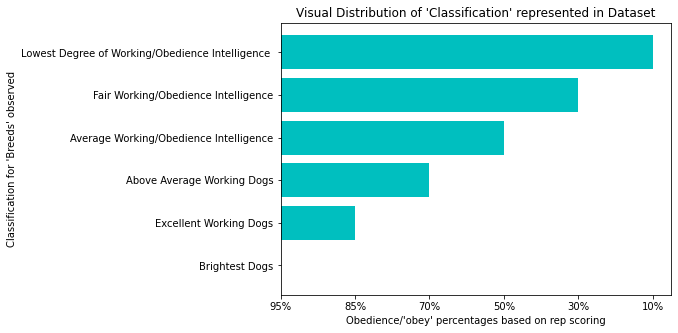

In [554]:
plt.barh(DF.Classification,DF.obey, color='c')
plt.xlabel("Obedience/'obey' percentages based on rep scoring")
plt.ylabel("Classification for 'Breeds' observed")
plt.title("Visual Distribution of 'Classification' represented in Dataset")

In [462]:
FERB=dummydf
#the dependent variable
y=FERB['Classification'].values
y.shape

(136,)

In [464]:
#the independent variables
x=FERB.drop('Classification', axis=1)

In [465]:
x.shape

(136, 9)

In [466]:
# standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [467]:
#Start model development
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter('ignore')

In [468]:
from sklearn.model_selection import train_test_split

In [469]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.20, random_state=42)

In [470]:
#create model
from sklearn.ensemble import RandomForestClassifier

In [471]:
model=RandomForestClassifier(n_estimators=10, random_state=42, oob_score=True)

In [472]:
model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10, oob_score=True, random_state=42)

In [473]:
predictions=model.predict(x_test)

In [474]:
#Checking accuracy and feature importance
from sklearn import metrics

In [475]:
print("The accuracy of the model = ", metrics.accuracy_score(y_test, predictions))

The accuracy of the model =  1.0


In [540]:
listedFeatures=list(x.columns)
feature_importance=pd.Series(model.feature_importances_,index=listedFeatures).sort_values(ascending=False)
print("The following shows the rates of features impact on classification using the RFC: ")
print(feature_importance)

The following shows the rates of features impact on classification using the RFC: 
obey_50%             0.281563
obey_30%             0.144319
level_4_success_2    0.131046
obey_85%             0.101698
level_4_success_3    0.085775
level_4_success_1    0.082493
obey_95%             0.064177
obey_10%             0.056583
obey_70%             0.052346
dtype: float64


In [541]:
model.oob_score_

1.0

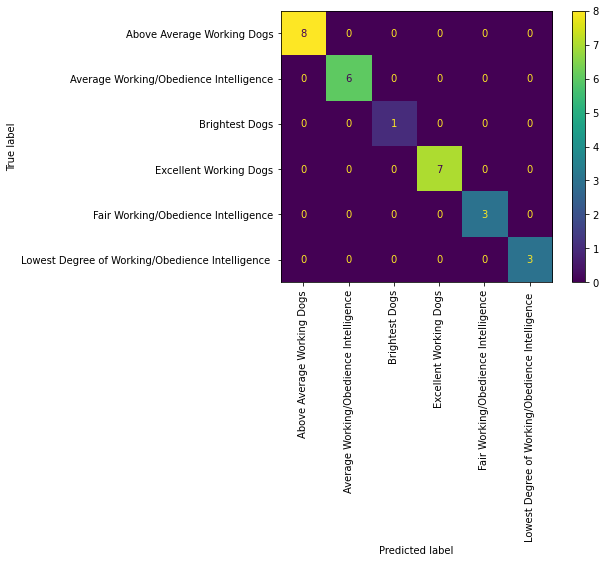

In [491]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
xticks_rotation=90
CM= confusion_matrix(y_test, predictions, labels=model.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=model.classes_)
display.plot( xticks_rotation=xticks_rotation)
plt.show()

In [492]:
#Showing the Random Forest Model diagram of selected feature 'prep' 
from sklearn import tree
fn=x.columns
fig, axes = plt.subplots(nrows=1,ncols=1,figsize=(1,1), dpi=10000)
tree.plot_tree(model.estimators_[0],
               feature_names=fn, 
               filled=True);
fig.savefig('random_forrest_individualtree.png')